<a href="https://colab.research.google.com/github/19PA1A0492/ensemble-methods/blob/master/ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
d= pd.read_csv("diabetis.csv")
print(d.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [0]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
d.shape

(768, 9)

In [0]:
d.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [0]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d.loc[:, d.columns != 'Outcome'], d['Outcome'], stratify=d['Outcome'], random_state=66)

# **DECISION TREE**

In [0]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(random_state=0)
Tree.fit(X_train, y_train)
Tree.score(X_test, y_test)

0.7135416666666666

In [0]:
Tree = DecisionTreeClassifier(max_depth=3, random_state=0)
Tree.fit(X_train, y_train)
print(Tree.score(X_train, y_train))
print(Tree.score(X_test, y_test))

0.7725694444444444
0.7395833333333334


# **DECISION TREE FEATURE IMPORTANCE:**

In [0]:
Tree.feature_importances_

array([0.04554275, 0.6830362 , 0.        , 0.        , 0.        ,
       0.27142106, 0.        , 0.        ])

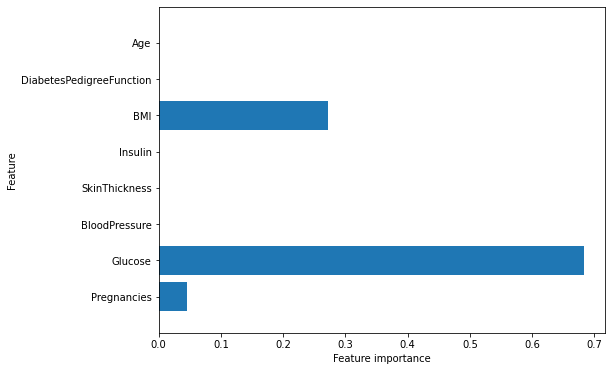

In [0]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), d.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

Here glucose is the most importance feature.

# **Random Forests**

In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)
print(RF.score(X_train, y_train))
print(RF.score(X_test, y_test))

1.0
0.7864583333333334


In [0]:
RF1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
RF1.fit(X_train, y_train)
print(RF1.score(X_train, y_train))
print(RF1.score(X_test, y_test))

0.8003472222222222
0.7552083333333334


# **Random forest important feature**

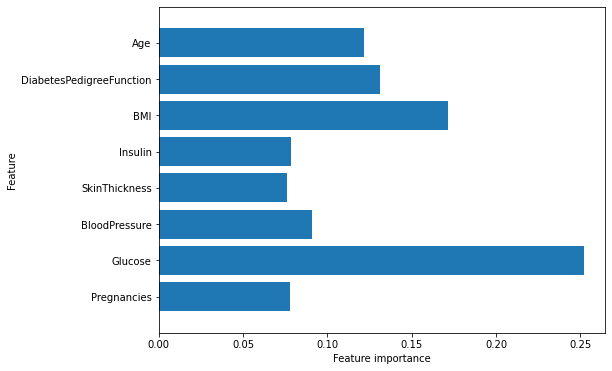

In [0]:
plot_feature_importances_diabetes(rf)

# **AdaBoost**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100)
classifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [0]:
classifier.score(X_test,y_test)

0.7916666666666666

# **Adaboost feature importance**

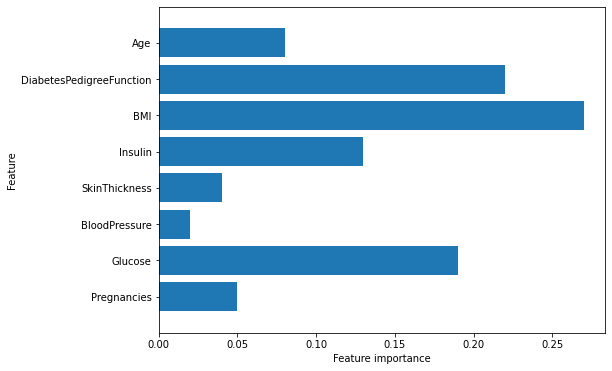

In [0]:
plot_feature_importances_diabetes(classifier)

The accuracy in AdaBoost is 0.792, the accuracy in Decision Tree Classifier is 0.739 whereas the accuracy in Random Forest is 0.755. With respect to the accuracies of classifiers AdaBoost performs better.